In [300]:
import pandas as pd
import numpy as np
import requests
import json
from pathlib import Path

In [301]:
# API Request

# Endpoint
jet_fuel_price_data = 'http://api.eia.gov/series/?api_key=6OerksEg68hMpcXhk6UrjNzXGKPBpEf6KombS4OS&series_id=PET.EER_EPJK_PF4_RGC_DPG.D'

# Fetch the data
response = requests.get(jet_fuel_price_data).json()

# Display the data
# jfl = json.dumps(response, indent = 4)

In [302]:
print(response)

{'request': {'command': 'series', 'series_id': 'PET.EER_EPJK_PF4_RGC_DPG.D'}, 'series': [{'series_id': 'PET.EER_EPJK_PF4_RGC_DPG.D', 'name': 'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB, Daily', 'units': 'Dollars per Gallon', 'f': 'D', 'unitsshort': '$/gal', 'description': 'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB', 'copyright': 'Thomson-Reuters', 'source': 'Thomson-Reuters', 'start': '19900402', 'end': '20220712', 'updated': '2022-07-13T13:50:56-0400', 'data': [['20220712', 3.518], ['20220711', 3.607], ['20220708', 3.524], ['20220707', 3.5], ['20220706', 3.246], ['20220705', 3.411], ['20220701', 3.779], ['20220630', 3.753], ['20220629', 3.872], ['20220628', 4.04], ['20220627', 4.133], ['20220624', 4.253], ['20220623', 4.066], ['20220622', 4.192], ['20220621', 4.21], ['20220617', 4.21], ['20220616', 4.401], ['20220615', 4.319], ['20220613', 4.079], ['20220610', 4.172], ['20220609', 4.213], ['20220608', 4.08], ['20220607', 4.086], ['20220606', 4.152], ['20220603',

In [303]:
type(response)

dict

In [304]:
response.keys()

dict_keys(['request', 'series'])

In [305]:
response['series']

[{'series_id': 'PET.EER_EPJK_PF4_RGC_DPG.D',
  'name': 'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB, Daily',
  'units': 'Dollars per Gallon',
  'f': 'D',
  'unitsshort': '$/gal',
  'description': 'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB',
  'copyright': 'Thomson-Reuters',
  'source': 'Thomson-Reuters',
  'start': '19900402',
  'end': '20220712',
  'updated': '2022-07-13T13:50:56-0400',
  'data': [['20220712', 3.518],
   ['20220711', 3.607],
   ['20220708', 3.524],
   ['20220707', 3.5],
   ['20220706', 3.246],
   ['20220705', 3.411],
   ['20220701', 3.779],
   ['20220630', 3.753],
   ['20220629', 3.872],
   ['20220628', 4.04],
   ['20220627', 4.133],
   ['20220624', 4.253],
   ['20220623', 4.066],
   ['20220622', 4.192],
   ['20220621', 4.21],
   ['20220617', 4.21],
   ['20220616', 4.401],
   ['20220615', 4.319],
   ['20220613', 4.079],
   ['20220610', 4.172],
   ['20220609', 4.213],
   ['20220608', 4.08],
   ['20220607', 4.086],
   ['20220606', 4.152],
   ['2022

In [306]:
test = response['series']

In [307]:
type(test)

list

In [308]:
test

[{'series_id': 'PET.EER_EPJK_PF4_RGC_DPG.D',
  'name': 'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB, Daily',
  'units': 'Dollars per Gallon',
  'f': 'D',
  'unitsshort': '$/gal',
  'description': 'U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB',
  'copyright': 'Thomson-Reuters',
  'source': 'Thomson-Reuters',
  'start': '19900402',
  'end': '20220712',
  'updated': '2022-07-13T13:50:56-0400',
  'data': [['20220712', 3.518],
   ['20220711', 3.607],
   ['20220708', 3.524],
   ['20220707', 3.5],
   ['20220706', 3.246],
   ['20220705', 3.411],
   ['20220701', 3.779],
   ['20220630', 3.753],
   ['20220629', 3.872],
   ['20220628', 4.04],
   ['20220627', 4.133],
   ['20220624', 4.253],
   ['20220623', 4.066],
   ['20220622', 4.192],
   ['20220621', 4.21],
   ['20220617', 4.21],
   ['20220616', 4.401],
   ['20220615', 4.319],
   ['20220613', 4.079],
   ['20220610', 4.172],
   ['20220609', 4.213],
   ['20220608', 4.08],
   ['20220607', 4.086],
   ['20220606', 4.152],
   ['2022

In [309]:
type(test[0])

dict

In [310]:
df_jf = pd.DataFrame(test[0]['data'])

In [311]:
df_jf

,0,1
0,20220712,3.518
1,20220711,3.607
2,20220708,3.524
3,20220707,3.500
4,20220706,3.246
...,...,...
8126,19900406,0.536
8127,19900405,0.540
8128,19900404,0.560
8129,19900403,0.555


In [312]:
df_jf.dtypes


0     object
1    float64
dtype: object

In [313]:
import datetime

In [314]:
df_jf[0]

0       20220712
1       20220711
2       20220708
3       20220707
4       20220706
          ...   
8126    19900406
8127    19900405
8128    19900404
8129    19900403
8130    19900402
Name: 0, Length: 8131, dtype: object

In [315]:
df_jf[0] = pd.to_datetime(df_jf[0])

In [316]:
df_jf.dtypes

0    datetime64[ns]
1           float64
dtype: object

In [317]:
df_jf

,0,1
0,2022-07-12,3.518
1,2022-07-11,3.607
2,2022-07-08,3.524
3,2022-07-07,3.500
4,2022-07-06,3.246
...,...,...
8126,1990-04-06,0.536
8127,1990-04-05,0.540
8128,1990-04-04,0.560
8129,1990-04-03,0.555


In [318]:
# df.rename(columns={"A": "a", "B": "c"})
df_jf.rename(columns={0 : 'date', 1 : 'jf_price'}, inplace = True)

In [319]:
df_jf.head()

,date,jf_price
0,2022-07-12,3.518
1,2022-07-11,3.607
2,2022-07-08,3.524
3,2022-07-07,3.500
4,2022-07-06,3.246


In [320]:
import matplotlib.pyplot as plt
%matplotlib inline

In [321]:
save_path = Path('SAVE_5_YEAR.csv')

# Read in data and index by date
save_data = pd.read_csv(
    save_path, 
    index_col='Date',     
    parse_dates=True, 
    infer_datetime_format=True
)
save_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-17,52.980000,53.840000,52.740002,53.400002,53.400002,1420600
2017-07-18,53.000000,53.439999,51.610001,52.060001,52.060001,2016000
2017-07-19,51.970001,52.259998,51.209999,51.950001,51.950001,1755400
2017-07-20,51.910000,52.040001,50.439999,50.570000,50.570000,1216900
2017-07-21,50.500000,50.700001,49.360001,50.119999,50.119999,1237300
...,...,...,...,...,...,...
2022-07-08,24.280001,25.110001,24.280001,24.900000,24.900000,3011000
2022-07-11,24.600000,24.690001,24.219999,24.410000,24.410000,1503000
2022-07-12,24.740000,25.000000,24.080000,24.170000,24.170000,2135500


In [322]:
save_data = save_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [323]:
save_data.head()

,Close
Date,
2017-07-17,53.400002
2017-07-18,52.060001
2017-07-19,51.950001
2017-07-20,50.570000
2017-07-21,50.119999


In [324]:
save_data.dtypes

Close    float64
dtype: object

In [325]:
df_jf.head()

,date,jf_price
0,2022-07-12,3.518
1,2022-07-11,3.607
2,2022-07-08,3.524
3,2022-07-07,3.500
4,2022-07-06,3.246


In [326]:
df_jf.set_index('date', inplace = True)

In [327]:
df_jf.head()

,jf_price
date,
2022-07-12,3.518
2022-07-11,3.607
2022-07-08,3.524
2022-07-07,3.500
2022-07-06,3.246


In [328]:
save_data.head()

,Close
Date,
2017-07-17,53.400002
2017-07-18,52.060001
2017-07-19,51.950001
2017-07-20,50.570000
2017-07-21,50.119999


In [329]:
save_data.index

DatetimeIndex(['2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20',
               '2017-07-21', '2017-07-24', '2017-07-25', '2017-07-26',
               '2017-07-27', '2017-07-28',
               ...
               '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [330]:
df_jf.index

DatetimeIndex(['2022-07-12', '2022-07-11', '2022-07-08', '2022-07-07',
               '2022-07-06', '2022-07-05', '2022-07-01', '2022-06-30',
               '2022-06-29', '2022-06-28',
               ...
               '1990-04-13', '1990-04-12', '1990-04-11', '1990-04-10',
               '1990-04-09', '1990-04-06', '1990-04-05', '1990-04-04',
               '1990-04-03', '1990-04-02'],
              dtype='datetime64[ns]', name='date', length=8131, freq=None)

In [331]:
df = df_jf.join(save_data)

In [332]:
df.dropna(inplace=True)

In [333]:
df.shape

(1247, 2)

In [334]:
df.head(25)

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
2022-07-05,3.411,24.139999
2022-07-01,3.779,24.549999
2022-06-30,3.753,23.840000
2022-06-29,3.872,22.410000


In [335]:
import matplotlib.pyplot as plt

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

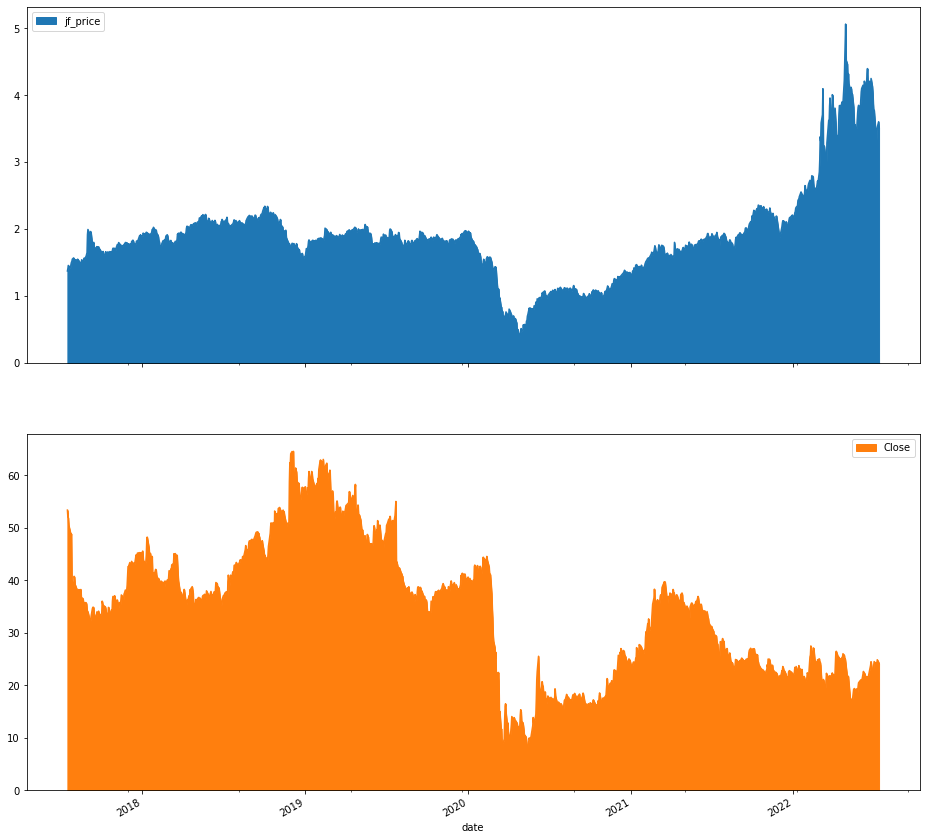

In [336]:
df.plot.area(figsize=(16, 16), subplots=True)

<AxesSubplot:title={'center':'Correlation Matrix'}>

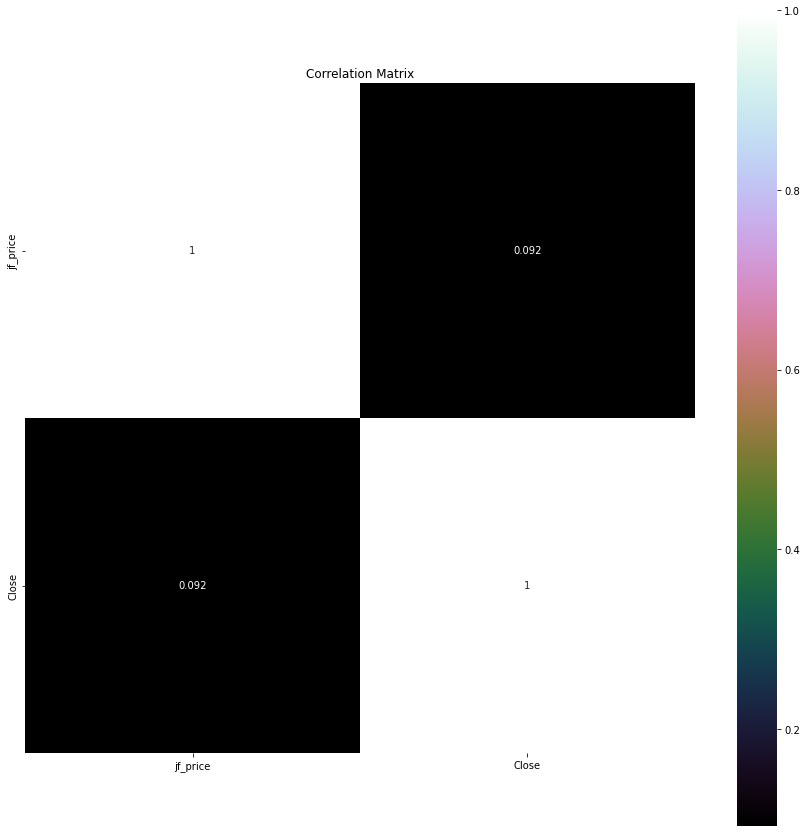

In [337]:
import seaborn as sns
correlate = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlate, vmax =1, square=True, annot=True, cmap='cubehelix')

In [338]:
X = df[['jf_price', 'Close']].dropna().copy()

X


,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
...,...,...
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001


In [339]:
# Display sample data
display(X.head())
display(X.tail())

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001


,jf_price,Close
date,,
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001
2017-07-18,1.412,52.060001
2017-07-17,1.377,53.400002


In [340]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1247 entries, 2022-07-12 to 2017-07-17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   jf_price  1247 non-null   float64
 1   Close     1247 non-null   float64
dtypes: float64(2)
memory usage: 29.2 KB


In [341]:
X

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
...,...,...
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001


In [342]:
y = df['Close'].copy()
y

date
2022-07-12    24.170000
2022-07-11    24.410000
2022-07-08    24.900000
2022-07-07    23.889999
2022-07-06    24.360001
                ...    
2017-07-21    50.119999
2017-07-20    50.570000
2017-07-19    51.950001
2017-07-18    52.060001
2017-07-17    53.400002
Name: Close, Length: 1247, dtype: float64

In [343]:
from pandas.tseries.offsets import DateOffset


In [352]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

# Select the ending period for the training data with an offset of 3 months
training_end = training_begin + DateOffset(months=36)

# Display the training end date
print(training_end)

2017-07-17 00:00:00
2020-07-17 00:00:00


In [349]:
X

,jf_price,Close
date,,
2022-07-12,3.518,24.170000
2022-07-11,3.607,24.410000
2022-07-08,3.524,24.900000
2022-07-07,3.500,23.889999
2022-07-06,3.246,24.360001
...,...,...
2017-07-21,1.424,50.119999
2017-07-20,1.453,50.570000
2017-07-19,1.460,51.950001


In [353]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   jf_price  0 non-null      float64
 1   Close     0 non-null      float64
dtypes: float64(2)
memory usage: 0.0 bytes


In [354]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-07-17 to 2017-07-17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   jf_price  754 non-null    float64
 1   Close     754 non-null    float64
dtypes: float64(2)
memory usage: 17.7 KB
